In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Current Food
current_food = pd.read_csv('current food.csv')
current_food.head(5)

,item,cost,calories per serving,servings left,week,cost per serving
0,Butter,4.0,100,32,1,0.125
1,Condiments,10.0,1,1,1,10.000
2,Rice,6.0,160,46,1,0.120
3,Condiments,10.0,90,8,2,0.100
4,Marco & Lucas,30.0,500,2,5,3.000


In [3]:
# Ate Out
ate_out = pd.read_csv('ate out.csv')
ate_out.head(5)

,item,cost,week
0,boba,10.0,1
1,Sandwiches,0.1,1
2,strip steak,8.0,1
3,pizza,5.0,1
4,Paffles,10.0,1


### Budgeting

Week 1: $11.11 left
Week 2: $-31.24 left
Week 3: $-5.52 left
Week 4: $30.61 left
Week 5: $2.58 left
Week 6: $32.09 left
Week 7: $55.0 left


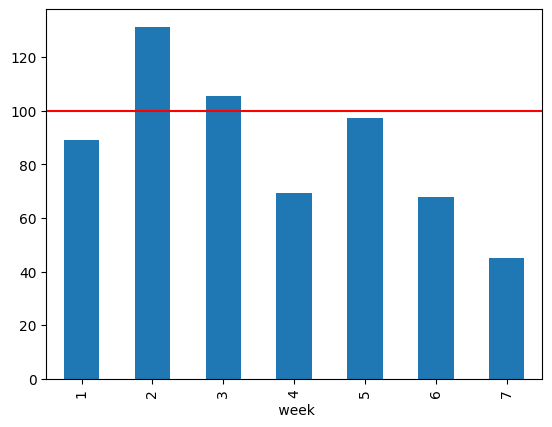

In [4]:
# Concat Current Food and Ate Out
food = pd.concat([current_food, ate_out], ignore_index=True, axis = 0)

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar')
weekly = food.groupby(' week')[' cost'].sum()

# Print Amount Under Budget
budget = 100
for i in range(1, len(weekly)+1):
    result = round(budget - weekly[i], 2)
    print("Week " + str(i) + ": $" + str(result) + " left")

# horizontal line
plt.axhline(y=100, color='r', linestyle='-')

### Calories

In [5]:
food['calories'] = food[' calories per serving'] * food[' servings left']
food.groupby(' week')['calories'].sum()


 week
1    10561.0
2      720.0
3     2750.0
4     3000.0
5     1000.0
6     5540.0
7    16060.0
Name: calories, dtype: float64

In [10]:
food[food[' week'] == 7].sort_values(by=' cost', ascending=False)



,item,cost,calories per serving,servings left,week,cost per serving,calories
27,Beef Stew,12.0,500.0,4.0,7,3.000000,2000.0
18,Chicken,5.0,500.0,7.0,7,1.250000,3500.0
22,Chicken Breasts,5.0,500.0,4.0,7,1.250000,2000.0
23,Pasta,4.0,210.0,12.0,7,0.333333,2520.0
25,Ham,4.0,100.0,4.0,7,1.000000,400.0
26,Ramen,4.0,210.0,2.0,7,2.000000,420.0
19,Pringles,3.0,150.0,6.0,7,0.500000,900.0
20,Sour Pringles,3.0,150.0,6.0,7,0.500000,900.0
21,Cheese Pringles,3.0,150.0,6.0,7,0.500000,900.0
24,Peanut Butter,2.0,180.0,14.0,7,0.142857,2520.0


In [7]:
food.dropna(axis=0).sort_values(by = ' week', ascending=True)

,item,cost,calories per serving,servings left,week,cost per serving,calories
0,Butter,4.00,100.0,32.0,1,0.125000,3200.0
1,Condiments,10.00,1.0,1.0,1,10.000000,1.0
2,Rice,6.00,160.0,46.0,1,0.120000,7360.0
3,Condiments,10.00,90.0,8.0,2,0.100000,720.0
5,Eggs,2.00,100.0,3.0,3,0.166667,300.0
6,Caprisun,8.00,100.0,13.0,3,0.400000,1300.0
7,Arizona,6.00,100.0,4.0,3,0.500000,400.0
8,Beef Yakisoba,3.00,500.0,1.0,3,1.000000,500.0
9,Rice Paper,4.00,50.0,5.0,3,0.200000,250.0
12,Eggs,2.00,100.0,10.0,4,0.166667,1000.0


day,0,1,2,3,4,5,6
week,,,,,,,
-1,110.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2900.0,1960.0,2070.0,2330.0,2600.0,1800.0
2,2130.0,2000.0,2580.0,2800.0,3031.0,2100.0,2470.0
3,2390.0,2590.0,2800.0,2140.0,2220.0,1820.0,2000.0
4,1890.0,1960.0,2090.0,1890.0,2150.0,1720.0,2200.0


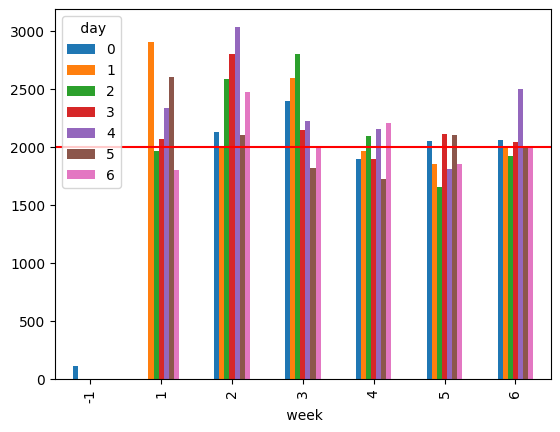

In [8]:
consumption = pd.read_csv('consumption.csv')
consumption.head(5)

import numpy as np
# pivot table of week and day
pivot = pd.pivot_table(consumption, values=' calories', index=[' week'],
                    columns=[' day'], aggfunc=np.sum)

# Plot Bar
pivot.plot(kind='bar')

#horizontal line at 2000
plt.axhline(y=2000, color='r', linestyle='-')

pivot.head(5)

### Master Plot

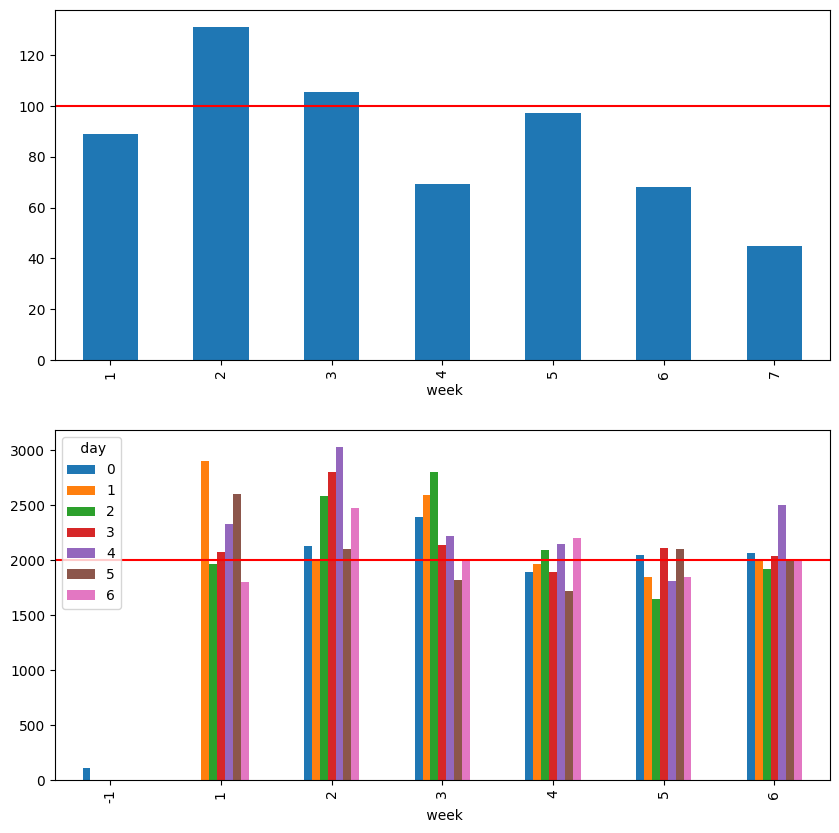

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot Food Spent Per Week
food.groupby(' week')[' cost'].sum().plot(kind='bar', ax=ax[0])
ax[0].axhline(y=100, color='r', linestyle='-')

# Plot Calories Per Week
pivot.plot(kind='bar', ax=ax[1])
ax[1].axhline(y=2000, color='r', linestyle='-')